### Réalisé par :

AIT AMARA Mohamed 181831072170

BOUROUINA Rania 181831052716   

CHIBANE Ilies 181831072041

HAMMAL Ayoub 181831048403

# TP 8 Distribution Gaussienne
Dans ce TP, nous aimerions explorer le classifieur base sur les distributions gaussiennnes pour une classification binaire.



# Importation des librairies necessaires au travail

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.metrics import f1_score

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [6]:
# données
X = np.genfromtxt('X.csv', delimiter=',', dtype=float)
X.shape

(307, 2)

Dans ces données (data), les 2 premières colonnes representent les caracteristiques de l'ensemble d'entrainement.

Chaque ligne represente un exemple de notre ensemble de données. 


# Entrainement 
dans cette partie nous allons calculer les parametres de la disribution gaussienne de chaque caracteristique.

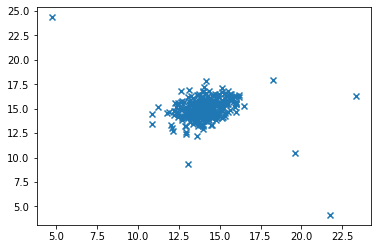

In [7]:
plt.scatter(X[:,0],X[:,1], marker ='x')

Mettons un lien avec ce que nous avons appris en regression linéaire

In [8]:
m = np.mean(X, axis=0)
v = np.var(X, axis=0)

In [11]:
def calculProba(X,m,v):
    return (1 / (np.sqrt(2 * v * np.pi))) * np.exp(- np.power(X - m, 2) / (2 * v))

In [ ]:
prob = calculProba(X, m, v)

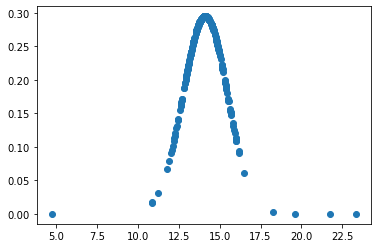

In [12]:
plt.scatter(X[:,0],prob[:,0])

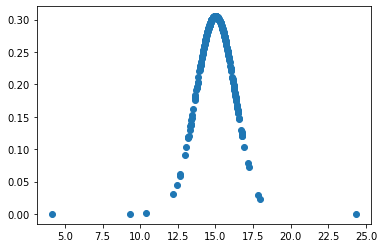

In [13]:
plt.scatter(X[:,1],prob[:,1])

In [31]:
yprob=prob[:,0]*prob[:,1]

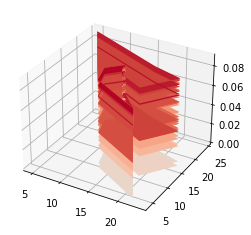

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  # Fonction pour la 3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax = fig.gca()  # Affichage en 3D
ax.plot_surface(X[:,0], X[:,1], yprob, cmap=cm.coolwarm, linewidth=0)  # Tracé d'une surface


In [18]:
X = np.genfromtxt('Xval.csv', delimiter=',', dtype=float)
y = np.genfromtxt('yval.csv', delimiter=',', dtype=float)[:, np.newaxis]

In [19]:
X.shape, y.shape

((307, 2), (307, 1))

In [20]:
m = np.mean(X, axis=0)
v = np.var(X, axis=0)

In [21]:
proba = calculProba(X, m, v)
yproba = proba[:,0]*proba[:,1]

In [24]:
f1_scores = []
proba = calculProba(X, m, v)
yproba = proba[:,0]*proba[:,1]
for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(yproba.shape)
    y_pred[yproba >= epsilon] = 0
    f1_scores.append((epsilon, f1_score(y, y_pred)))

In [82]:
threshold = list(sorted(f1_scores, key=lambda x: x[1], reverse=True))[0]
threshold

(0.0002, 0.8750000000000001)

Avec la multigaussienne 

In [79]:
def calculProbaMulti(X):
    cov = np.cov(X.T)
    m = np.mean(X, axis=0)
    return (1 / np.sqrt(2 * np.pi * np.linalg.det(cov))) * np.exp((- 1 / 2) * (((X - m) @ np.linalg.inv(cov)) * (X - m)).sum(axis=1))[:, np.newaxis]

In [80]:
proba_multi = calculProbaMulti(X)

In [84]:
f1_scores = []
yproba = calculProbaMulti(X)
for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(yproba.shape)
    y_pred[yproba >= epsilon] = 0
    f1_scores.append((epsilon, f1_score(y, y_pred)))

In [85]:
threshold = list(sorted(f1_scores, key=lambda x: x[1], reverse=True))[0]
threshold

(0.0001, 0.8750000000000001)

On a le même F1 score avec les deux méthodes mais avec des threasholds différents

# Travail à faire
- 1) Nous aimerions bien choisir le epsilon, ceci est fait en analysant le score F1 obtenu precedenmment
- 2) nous aimerions appliquer une gaussienne multivariée à nos caracterisqtues; et comparer les deux résultats (multiplication des gaussiennes univariées, et gaussienne multivariée)
- 3) Nous aimerions visualiser en 3D la multiplication des gaussiennes univariées et la gaussienne multivariée pour comparaison. 
- 4) **** En Bonus - PAS obligatoire **** : nous aimerions utiliser la loi de Bayes afin de classifier nos exemples. Pour cela, voir le cours.

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le Lundi 23 Mai 2022 à 22h


In [27]:
# bonne chance